Step 1: Importing Libarires !!!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning libaries for this project i have choosen is RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

Step 2 : Loading Datset and Making the dataset combined of years from range 2010 to 2016

In [3]:
data_file='SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx'
years=range(2010,2017)
print(years[0])

2010


In [4]:
#example dataset loading in Commoditiy
df_ex = pd.read_excel(data_file,sheet_name=f'{years[1]}_Detail_Commodity')
print(f"The {years[1]}_Detail_Commodity is ==> :",df_ex.head())

The 2011_Detail_Commodity is ==> :   Commodity Code                                     Commodity Name  \
0         1111A0  Fresh soybeans, canola, flaxseeds, and other o...   
1         1111A0  Fresh soybeans, canola, flaxseeds, and other o...   
2         1111A0  Fresh soybeans, canola, flaxseeds, and other o...   
3         1111A0  Fresh soybeans, canola, flaxseeds, and other o...   
4         1111B0          Fresh wheat, corn, rice, and other grains   

        Substance                               Unit  \
0  carbon dioxide       kg/2018 USD, purchaser price   
1         methane       kg/2018 USD, purchaser price   
2   nitrous oxide       kg/2018 USD, purchaser price   
3      other GHGs  kg CO2e/2018 USD, purchaser price   
4  carbon dioxide       kg/2018 USD, purchaser price   

   Supply Chain Emission Factors without Margins  \
0                                          0.426   
1                                          0.001   
2                                          0.

In [5]:
#example dataset loading in Industry 
df_ex1 = pd.read_excel(data_file,sheet_name=f'{years[1]}_Detail_Industry')
print(f"The {years[1]}_Detail_Industry is ==> :",df_ex1.head())

The 2011_Detail_Industry is ==> :   Industry Code    Industry Name       Substance  \
0        1111A0  Oilseed farming  carbon dioxide   
1        1111A0  Oilseed farming         methane   
2        1111A0  Oilseed farming   nitrous oxide   
3        1111A0  Oilseed farming      other GHGs   
4        1111B0    Grain farming  carbon dioxide   

                                Unit  \
0       kg/2018 USD, purchaser price   
1       kg/2018 USD, purchaser price   
2       kg/2018 USD, purchaser price   
3  kg CO2e/2018 USD, purchaser price   
4       kg/2018 USD, purchaser price   

   Supply Chain Emission Factors without Margins  \
0                                          0.440   
1                                          0.001   
2                                          0.002   
3                                          0.003   
4                                          0.732   

  Margins of Supply Chain Emission Factors  \
0                                     0.07   
1      

In [6]:
#Now Combing the commodity and Industry of every year and storing in one list and I,changing the column name for understanding like name and code
full_data=[]
for y in years:
    df_com=pd.read_excel(data_file,sheet_name=f'{y}_Detail_Commodity')
    df_ind=pd.read_excel(data_file,sheet_name=f'{y}_Detail_Industry')
    df_com['EasyAccess']='Commodity'
    df_ind['EasyAccess']='Industry'
    df_com['Year']=df_ind['Year']=y

    #Now renaming the columns into code and name
    df_com.rename(columns={'Commodity Code':'Code','Commodity Name':'Name'},inplace=True)
    df_ind.rename(columns={'Industry Code':'Code','Industry Name':'Name'},inplace=True)

    merged_df=pd.concat([df_com,df_ind],ignore_index=True)
    full_data.append(merged_df)

In [7]:
#Just now Combining all years to one dataframe
df=pd.concat(full_data,ignore_index=True)
print(df.shape)
df.head()

(22092, 15)


,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,EasyAccess,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.0,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.0,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [8]:
#Now Accesing the first Column for every year let us do 
df.groupby('Year').head(1)

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,EasyAccess,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
3156,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.426,0.07,0.496,NaN,4,3,1,4,1,Commodity,2011
6312,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.438,0.068,0.506,NaN,4,3,1,4,1,Commodity,2012
9468,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013
12624,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.355,0.064,0.419,NaN,4,2,1,4,1,Commodity,2014
15780,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.354,0.063,0.417,NaN,3,2,1,4,1,Commodity,2015
18936,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.323,0.066,0.389,NaN,3,2,1,4,1,Commodity,2016


Step 3: Preprocessing Steps

In [10]:
# Drop duplicates values
df.drop_duplicates(inplace=True)
# Check and fill missing values
df.drop(columns=['Unnamed: 7'], inplace=True)
print("Missing values:\n", df.isnull().sum())

# Fill numeric NAs with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill categorical NAs with mode
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0])

# Encode categorical columns

label_cols = ['Name', 'Substance', 'Unit', 'EasyAccess']  
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("Preprocessing complete. Data shape:", df.shape)

Missing values:
 Code                                                      0
Name                                                      0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
EasyAccess                                                0
Year                                                      0
dtype: int64
Preprocessing complete. Data shape: (22092, 14)


In [11]:
df.head()
print(df.dtypes)

Code                                                       object
Name                                                        int64
Substance                                                   int64
Unit                                                        int64
Supply Chain Emission Factors without Margins             float64
Margins of Supply Chain Emission Factors                   object
Supply Chain Emission Factors with Margins                float64
DQ ReliabilityScore of Factors without Margins              int64
DQ TemporalCorrelation of Factors without Margins           int64
DQ GeographicalCorrelation of Factors without Margins       int64
DQ TechnologicalCorrelation of Factors without Margins      int64
DQ DataCollection of Factors without Margins                int64
EasyAccess                                                  int64
Year                                                        int64
dtype: object


Step 4 : Preparing Data for Modeling

In [12]:
# First declaring the input features and the output features reapective(X,y)
y=df['Supply Chain Emission Factors with Margins'] 
X = df.drop(['Supply Chain Emission Factors with Margins'],axis=1)
X=X.drop(['Name','Code','EasyAccess'],axis=1)  #Iam dropping it because it never be usefull for my case
data = pd.concat([X, y], axis=1)
data = data[data["Margins of Supply Chain Emission Factors"] != "Main feature"]
data["Margins of Supply Chain Emission Factors"] = data["Margins of Supply Chain Emission Factors"].astype(float)

# STEP 4: Split back into X and y
X = data.drop("Supply Chain Emission Factors with Margins", axis=1)
y = data["Supply Chain Emission Factors with Margins"]


#Now Splitting the values by training and testing (80% for training and 20 % for testing)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Now Training the model Random Forest Regressor
mod=RandomForestRegressor()
mod.fit(X_train,y_train)
y_pred=mod.predict(X_test)


Evaluating The Metrics before the Hyperparameter Tuning

In [13]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error :",mse)
print("R2_Score :",r2)

Mean Squared Error : 4.414334747836621e-05
R2_Score : 0.9994187999821904


Step 5 : Visualization part

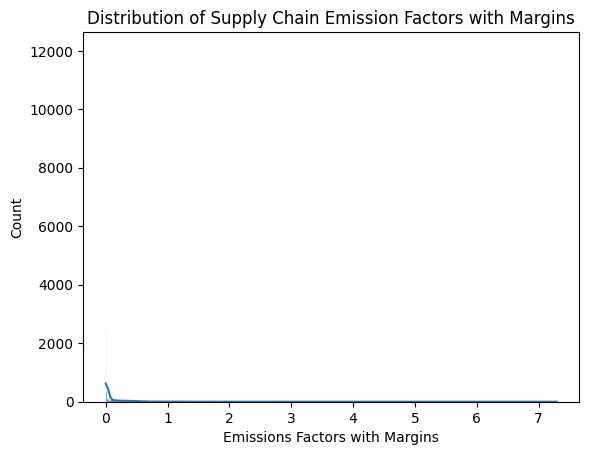

In [14]:
sns.histplot(y,kde=True)
plt.title("Distribution of Supply Chain Emission Factors with Margins")
plt.xlabel("Emissions Factors with Margins")
plt.show()

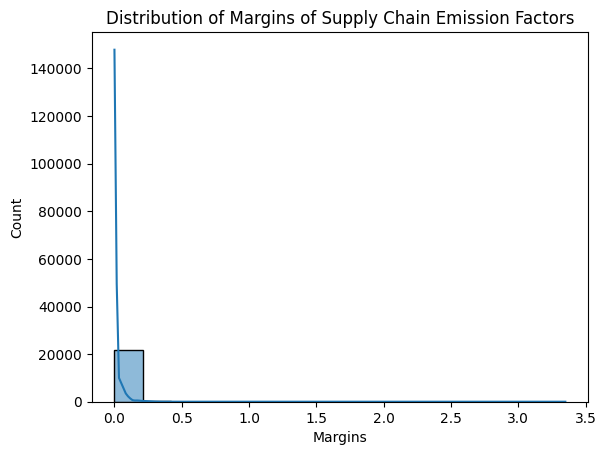

In [15]:
sns.histplot(X['Margins of Supply Chain Emission Factors'],kde=True)
plt.title("Distribution of Margins of Supply Chain Emission Factors")
plt.xlabel("Margins")
plt.show()

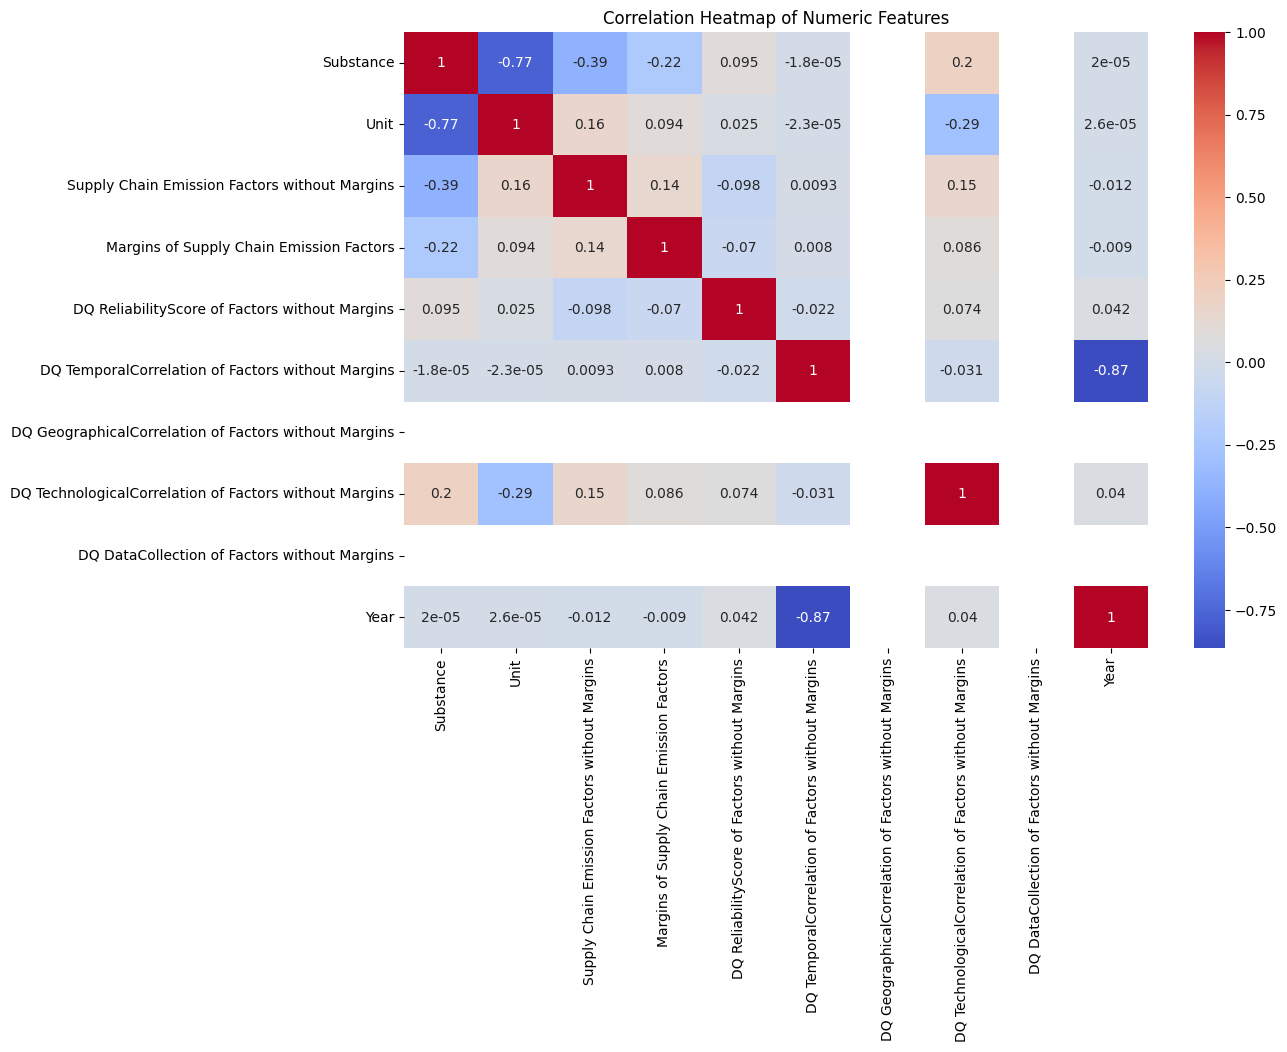

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

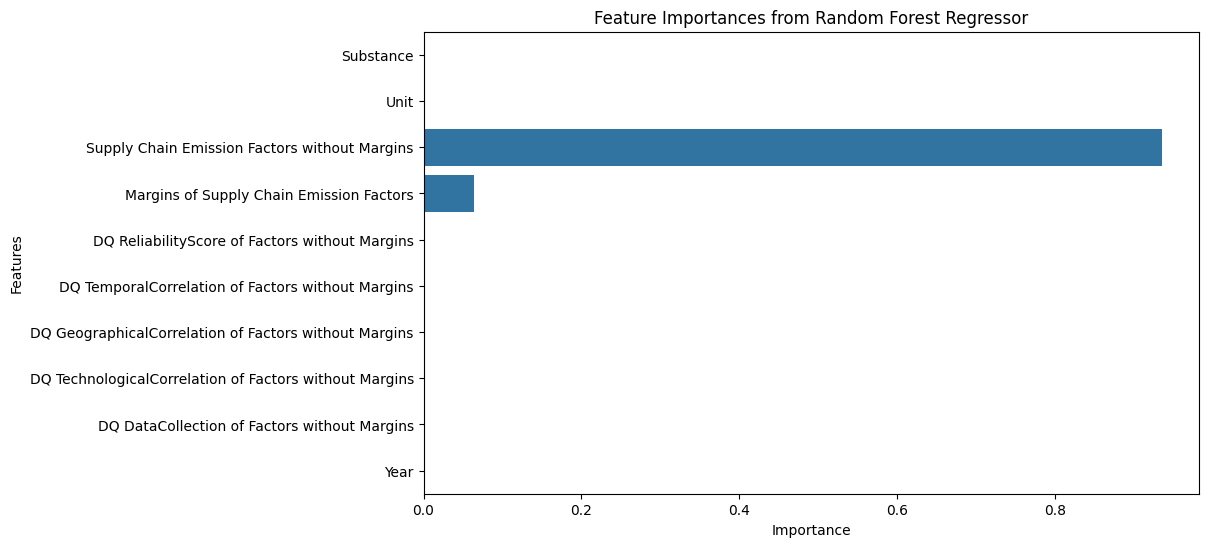

In [17]:
importances = mod.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances from Random Forest Regressor")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

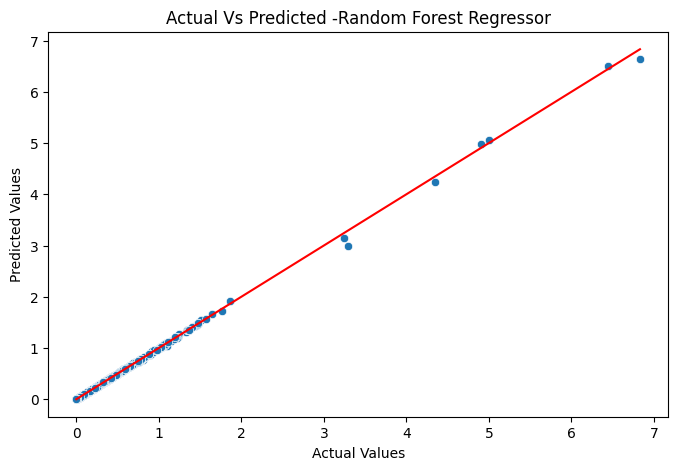

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test,y=y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Vs Predicted -Random Forest Regressor")
plt.show()

Step 6: Now we can Add Hyperparameter Tuning

In [20]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50],
    'max_depth': [5, 10],
    'min_samples_split':[2],
    'min_samples_leaf':[1,2]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
R² Score: 0.999379029778626
Mean Squared Error: 4.7163976971531556e-05
